# Predicting Wine Quality
> We will be analyzing the quality of red and white wines, and check which are the attributes that affect wine quality the most.

- toc: true
- branch: master
- badges: true
- comments: true
- categories: [classification]

In this blog post we will be analyzing the quality of red and white wines, and check which are the attributes that affect wine quality the most.

There are two datasets, related to red and white Vinho Verde wine samples, from the north of Portugal. The datasets can be downloaded [here](https://archive.ics.uci.edu/ml/datasets/wine+quality). The goal is to model wine quality based on physicochemical tests. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).  

#### Attribute Information:

Input variables (based on physicochemical tests):
1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol 

Output variable (based on sensory data):
12. quality (score between 0 and 10)

---
## Red Wine
Let's first consider the red wine dataset.

### Data Analysis

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# create a pandas dataframe
df_red = pd.read_csv('winequality-red.csv')
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df_red.shape

(1599, 12)

There are 1,599 samples and 12 features, including our target feature - the wine quality.

In [4]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


All of our dataset is numeric and there are no missing values.

In [5]:
df_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


To understand how much each attribute correlates with the wine quality, we can compute the standard correlation coefficient or Pearson's r between every pair of attributes.

In [6]:
corr_matrix = df_red.corr()
corr_matrix['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

We now know the features that most affect the wine quality.  
Wine quality is directly proportional to the amount of alcohol, sulphates, citric acid.  
Wine quality is inversely proportional to the amount of volatile acidity, total sulfur dioxide, density.

---
### Data Visualization
Let's visualize the data by creating histograms and density plots. We can understand the distribution for separate attributes.

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

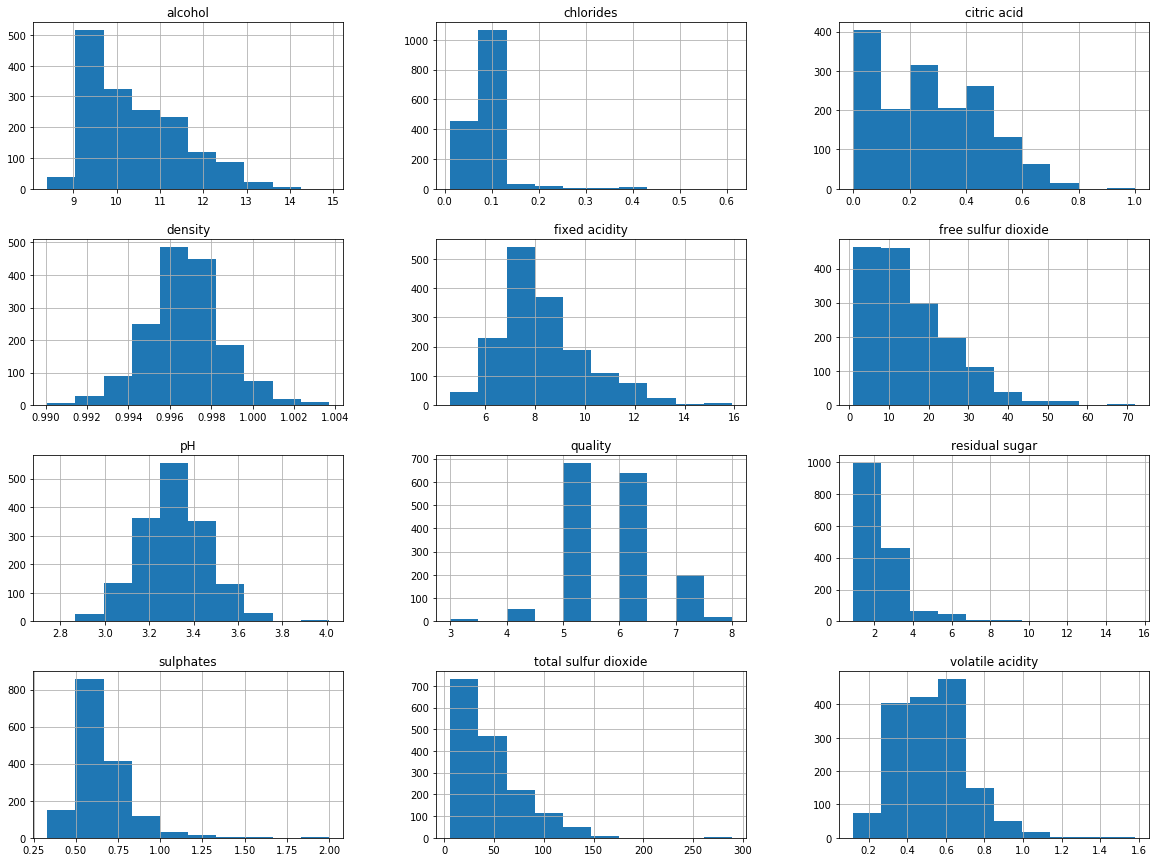

In [8]:
# histograms
df_red.hist(bins=10, figsize=(20, 15))
plt.show()

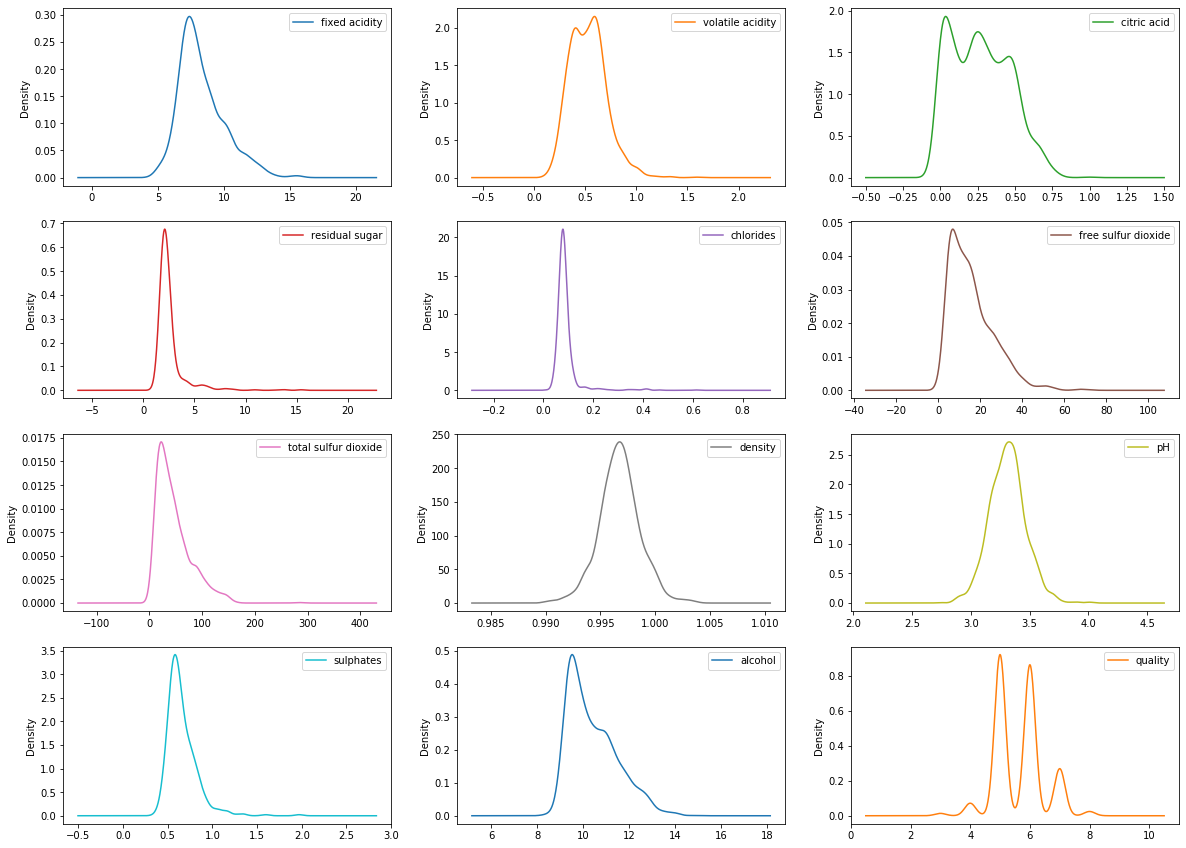

In [9]:
# density plots
df_red.plot(kind='density', subplots=True, figsize=(20,15),
           layout=(4,3), sharex=False)
plt.show()

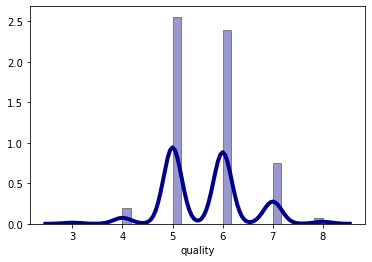

In [10]:
sns.distplot(df_red['quality'], hist=True, kde=True,
             bins='auto', color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.show()

The data distribution for the alcohol, citric acid and sulfur dioxide content atrributes is positively skewed.  
The data distribution for the density and pH attributes is quite normally distributed.  
The wine quality data distribution is a bimodal distribution and there are more wines with an average quality than wines with good or bad quality.

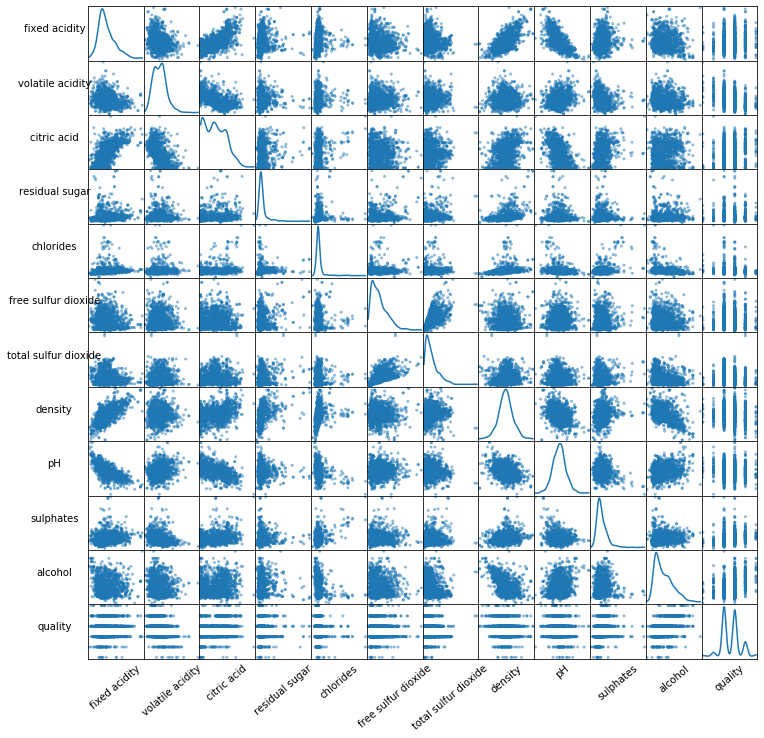

In [12]:
from pandas.plotting import scatter_matrix
sm = scatter_matrix(df_red, figsize=(12, 12), diagonal='kde')
#Change label rotation
[s.xaxis.label.set_rotation(40) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]
#May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-0.6,0.5) for s in sm.reshape(-1)]
#Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]
plt.show()


Let's create a pivot table that describes the median value of each feature for each quality score.

In [13]:
# pivot table
column_names = ['fixed acidity', 'volatile acidity', 'citric acid', 
                'residual sugar', 'chlorides', 'free sulfur dioxide', 
                'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

df_red_pivot_table = df_red.pivot_table(column_names, 
                                    ['quality'],
                                    aggfunc='median')

df_red_pivot_table

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,total sulfur dioxide,volatile acidity
quality,,,,,,,,,,,
3,9.925,0.0905,0.035,0.997565,7.50,6.0,3.39,2.1,0.545,15.0,0.845
4,10.000,0.0800,0.090,0.996500,7.50,11.0,3.37,2.1,0.560,26.0,0.670
5,9.700,0.0810,0.230,0.997000,7.80,15.0,3.30,2.2,0.580,47.0,0.580
6,10.500,0.0780,0.260,0.996560,7.90,14.0,3.32,2.2,0.640,35.0,0.490
7,11.500,0.0730,0.400,0.995770,8.80,11.0,3.28,2.3,0.740,27.0,0.370
8,12.150,0.0705,0.420,0.994940,8.25,7.5,3.23,2.1,0.740,21.5,0.370


We can see just how much effect does the alcohol content and volatile acidity have on the quality of the wine.

We can plot a correlation matrix to see how two variables interact, both in direction and magnitude.

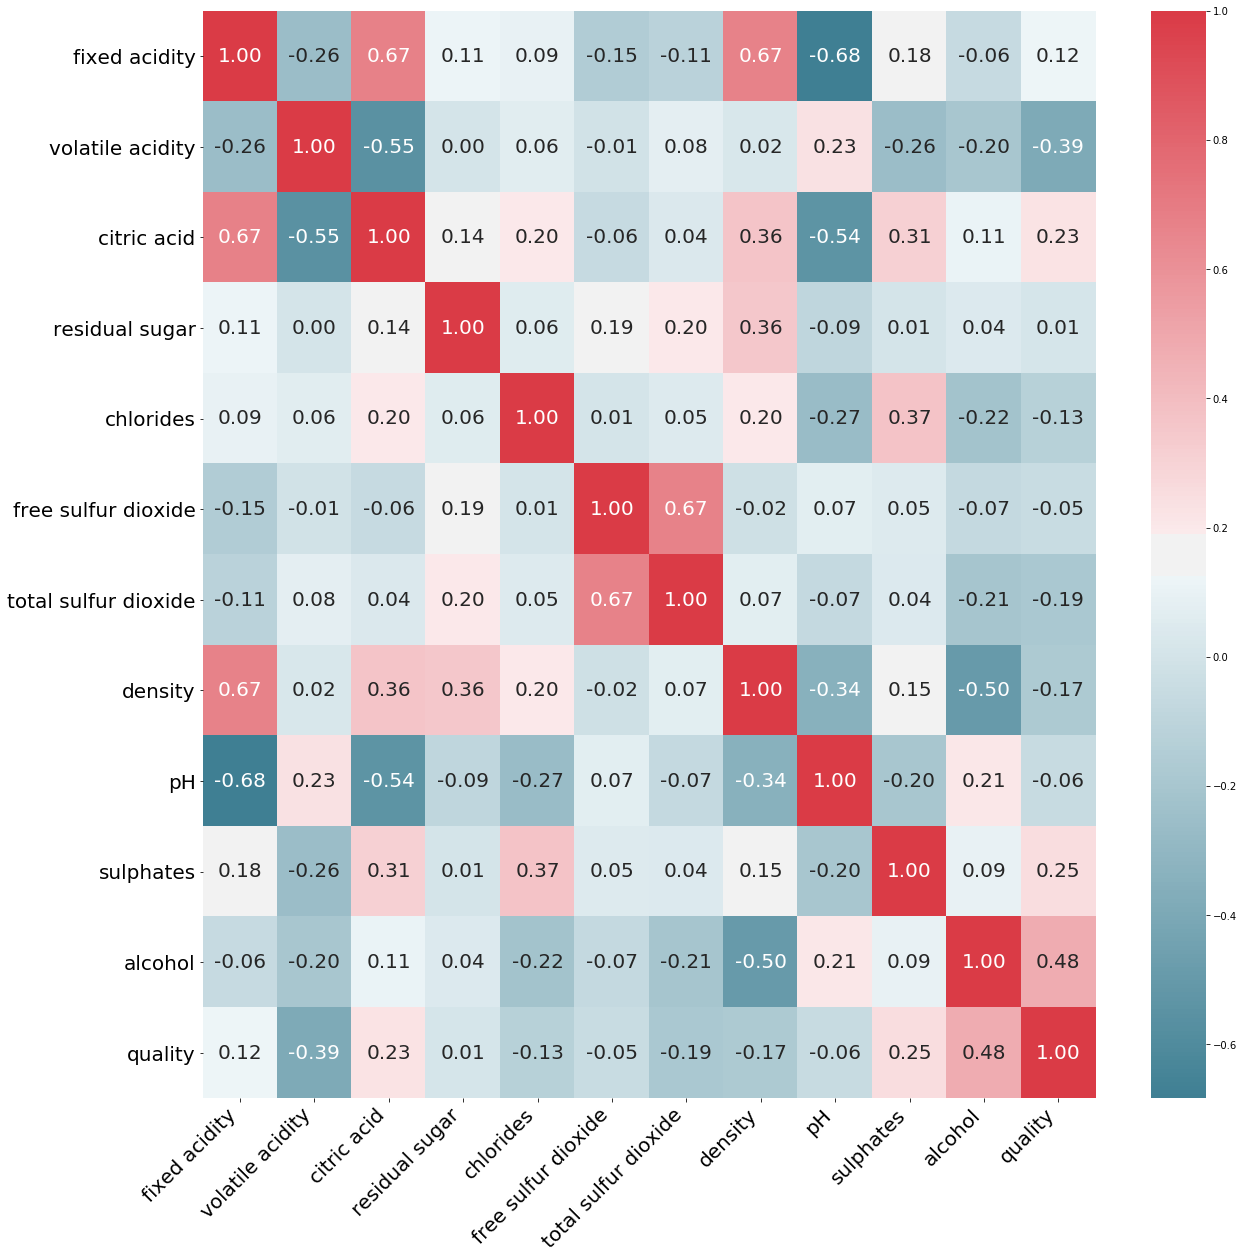

In [14]:
column_names = ['fixed acidity', 'volatile acidity', 'citric acid', 
                'residual sugar', 'chlorides', 'free sulfur dioxide', 
                'total sulfur dioxide', 'density', 'pH', 'sulphates', 
                'alcohol', 'quality']

# plot correlation matrix
fig, ax = plt.subplots(figsize=(20, 20))
colormap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr_matrix, cmap=colormap, annot=True,
           fmt='.2f', annot_kws={'size': 20})
ax.set_xticklabels(column_names, 
                   rotation=45, 
                   horizontalalignment='right',
                   fontsize=20);
ax.set_yticklabels(column_names, fontsize=20);
plt.show()

---
### Data Cleaning

In our dataset, there aren't any missing values, outliers, or attributes that provide no useful information for the task. So, we could conclude than our dataset is quite clean.  
The wine preference scores vary from 3 to 8, so it's straightforward to categorize them into 'bad' or 'good' quality of wines. We will assign discrete values of 0 and 1 for the corresponding categories.

In [15]:
# Dividing wine as good and bad by giving a limit for the quality
bins = (2, 6, 8)
group_names = ['bad', 'good']
df_red['quality'] = pd.cut(df_red['quality'], bins = bins, labels = group_names)

0    1382
1     217
Name: quality, dtype: int64


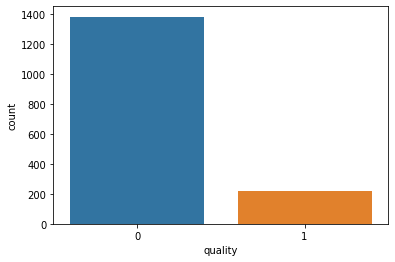

In [16]:
from sklearn.preprocessing import LabelEncoder

# let's assign labels to our quality variable
label_quality = LabelEncoder()
# Bad becomes 0 and good becomes 1
df_red['quality'] = label_quality.fit_transform(df_red['quality'])
print(df_red['quality'].value_counts())

sns.countplot(df_red['quality'])
plt.show()

As we can see, there are far more bad quality red wines (1,382) than good quality ones (217).

---

### Train/Test Split

Now we will split the dataset into a training set and a testing set.

In [17]:
# separate the dataset
X = df_red.drop('quality', axis=1)
y = df_red['quality']

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

---
### Data Preprocessing

We will scale the features so as to get optimized results.

In [19]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

---
### Modeling
We will be evaluating 8 different algorithms.
1. Support Vector Classifier
2. Stochastic Gradient Decent Classifier
3. Random Forest Classifier
4. Decision Tree Classifier
5. Gaussian Naive Bayes
6. K-Neighbors Classifier
7. Ada Boost Classifier
8. Logistic Regression

The key to a fair comparison of machine learning algorithms is ensuring that each algorithm is evaluated in the same way on the same data. *K-fold Cross Validation* provides a solution to this problem by dividing the data into folds and ensuring that each fold is used as a testing set at some point.

In [29]:
# import libraries
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV, cross_val_score

In [30]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

SupportVectorClassifier: 0.889782 (0.023210)
StochasticGradientDecentC: 0.849151 (0.044240)
RandomForestClassifier: 0.912457 (0.029968)
DecisionTreeClassifier: 0.877264 (0.028120)
GaussianNB: 0.836559 (0.022781)
KNeighborsClassifier: 0.873364 (0.021081)
AdaBoostClassifier: 0.885876 (0.019715)
LogisticRegression: 0.883526 (0.031077)


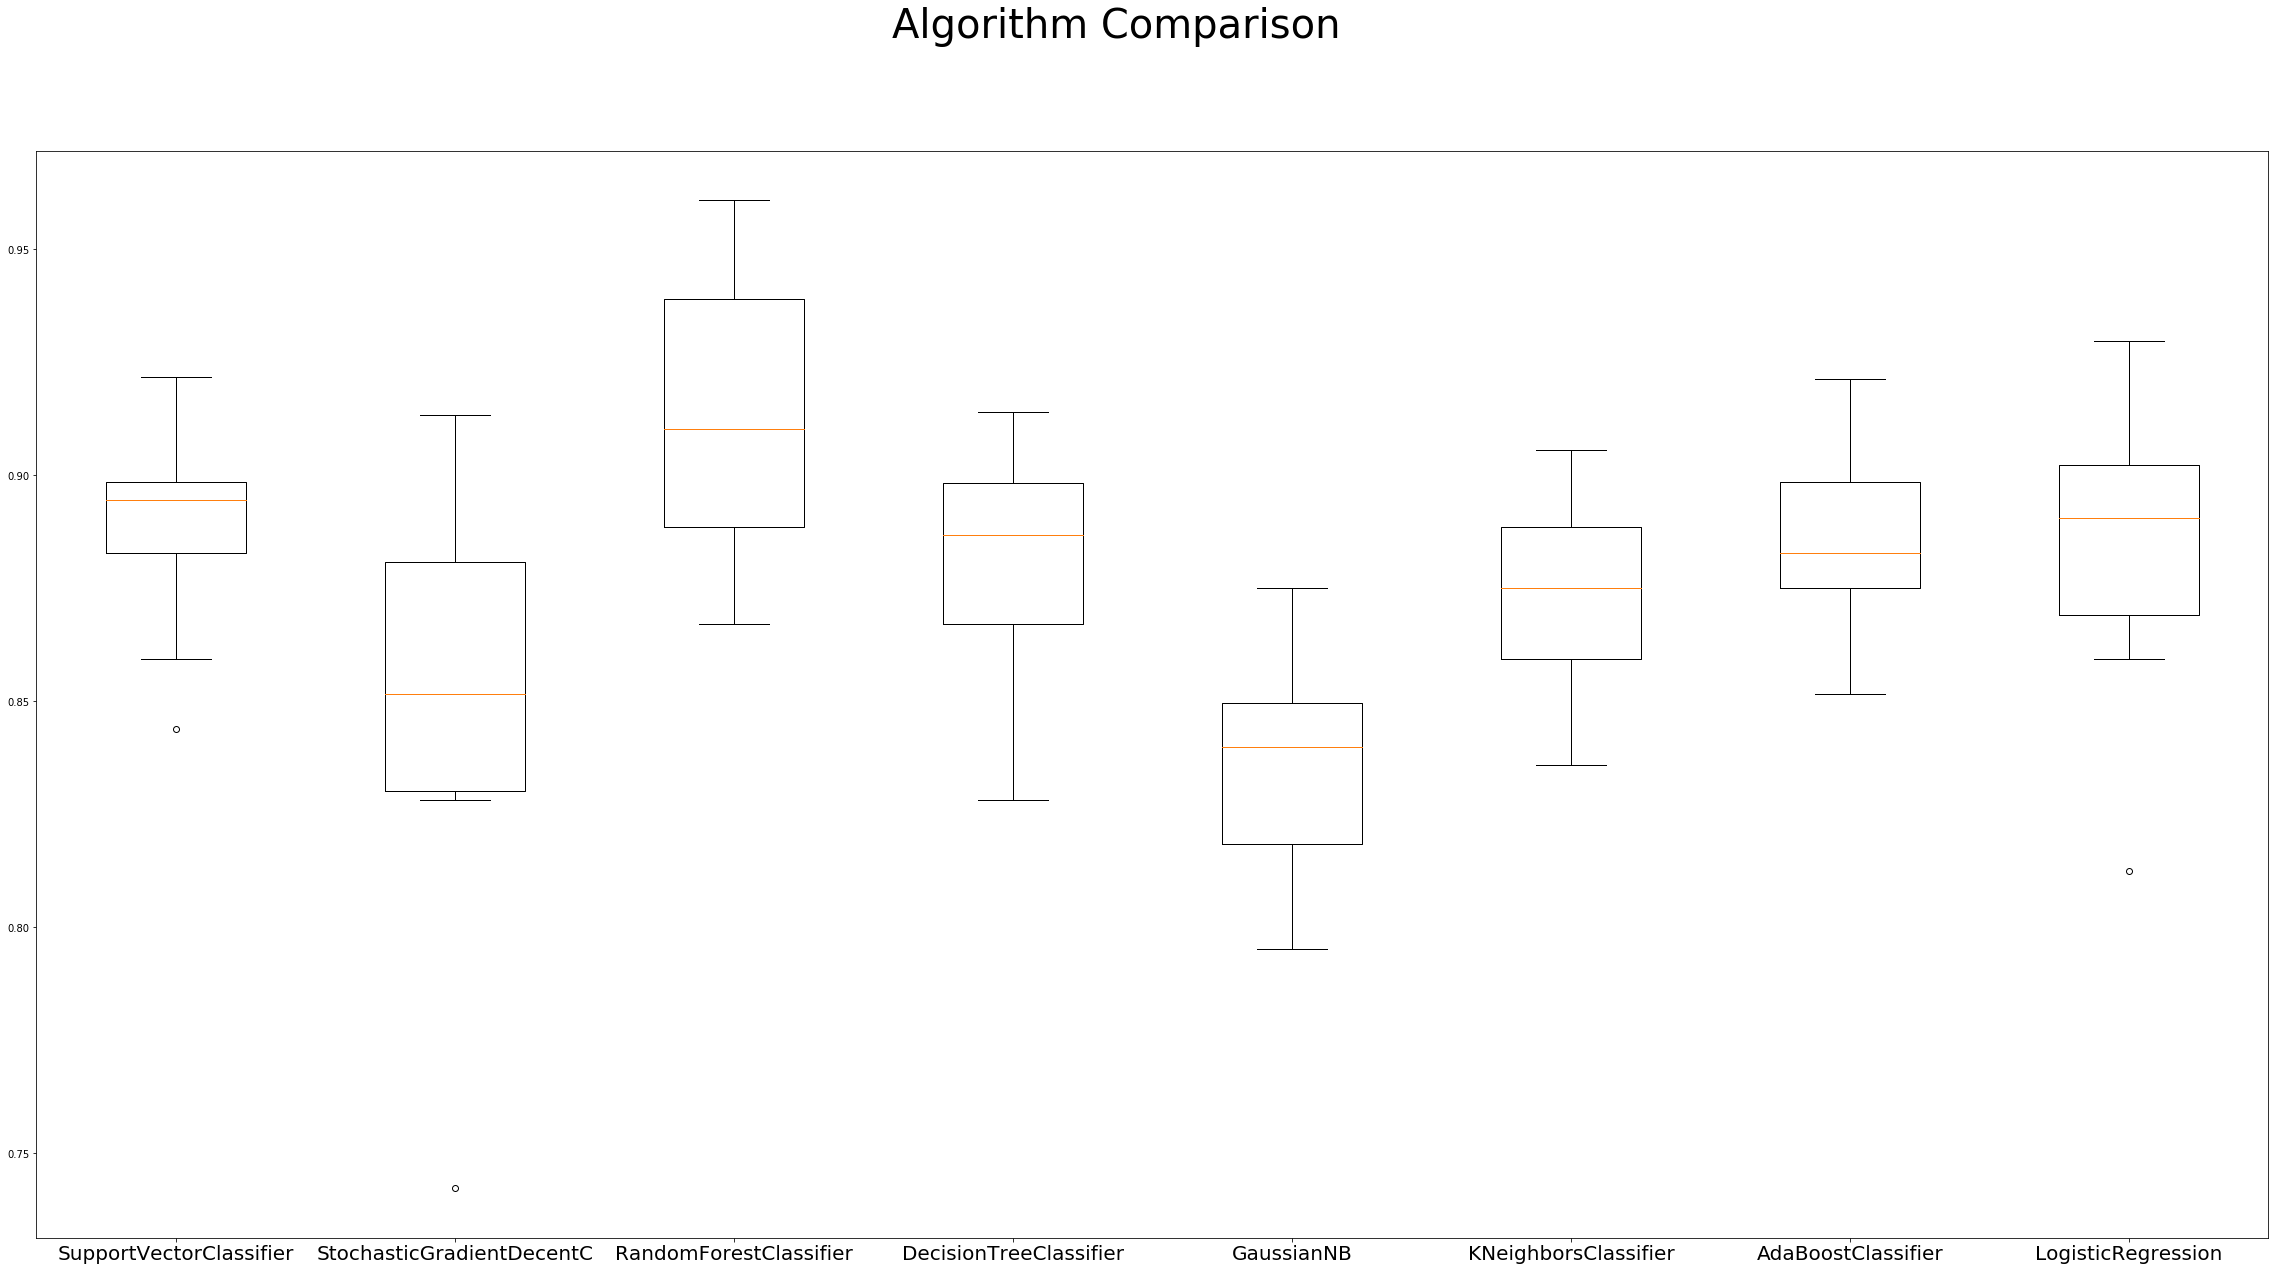

In [31]:
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('SupportVectorClassifier', SVC()))
models.append(('StochasticGradientDecentC', SGDClassifier()))
models.append(('RandomForestClassifier', RandomForestClassifier()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('GaussianNB', GaussianNB()))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('AdaBoostClassifier', AdaBoostClassifier()))
models.append(('LogisticRegression', LogisticRegression()))# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
   kfold = model_selection.KFold(n_splits=10, random_state=seed)
   cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
   results.append(cv_results)
   names.append(name)
   msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
   print(msg)
    
# boxplot algorithm comparison
fig = plt.figure(figsize=(40, 20))
fig.suptitle('Algorithm Comparison', fontsize=40)
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, fontdict={'fontsize': 20})
plt.show()

The Box Plots of these algorithms' accuracy distribution is quite symmetrical, with negligible outliers. The adjacent box plot values are close together, which correspond to the high density of accuracy scores.

---
### Hyperparameter Tuning

There are several factors that can help us determine which algorithm performs best. One such factor is the performance on the cross-validation set and another factor is the choice of parameters for an algorithm.  

#### SVC
Let's fine-tune our algorithms. The first algorithm that we trained and evaluated was the *Support Vector Classifier* and the mean value for model prediction was *0.889*. We will use *GridSearchCV* for the hyperparameter tuning.

In [32]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [33]:
def svc_param_selection(X, y, nfolds):
    param = {
        'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
        'kernel': ['linear', 'rbf'],
        'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4]
    }
    grid_search = GridSearchCV(svc, param_grid=param, 
                               scoring='accuracy', cv=nfolds)
    grid_search.fit(X, y)
    return grid_search.best_params_

svc_param_selection(X_train, y_train, 10)

{'C': 1.2, 'gamma': 0.9, 'kernel': 'rbf'}

Hence, the best parameters for the SVC algorithm are **{C= 1.2, gamma= 0.9 , kernel= rbf}**.  
Let's run our SVC algorithm again with the best parameters.

In [34]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_absolute_error

svc2 = SVC(C= 1.2, gamma= 0.9, kernel= 'rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print('Confusion matrix')
print(confusion_matrix(y_test, pred_svc2))
print('Classification report')
print(classification_report(y_test, pred_svc2))
print('Accuracy score',accuracy_score(y_test, pred_svc2))

Confusion matrix
[[271   2]
 [ 31  16]]
Classification report
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       273
           1       0.89      0.34      0.49        47

    accuracy                           0.90       320
   macro avg       0.89      0.67      0.72       320
weighted avg       0.90      0.90      0.88       320

Accuracy score 0.896875


The overall accuracy of the classifier is **89.69%**, and f1-score of the weighted avg is **0.88**, which is very good.

#### Stochastic Gradient Descent Classifier

In [35]:
sgd = SGDClassifier(loss='hinge', penalty='l2', max_iter=60)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)

#### Random Forest Classifier

In [36]:
rfc = RandomForestClassifier(n_estimators=200, max_depth=20,
                             random_state=0)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

#### KNeighbors Classifier

In [37]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)

In [38]:
def knn_param_selection(X, y, nfolds):
    param = {
        'n_neighbors': [2, 3, 4, 5, 6],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'p': [1, 2]
    }
    grid_search = GridSearchCV(knn, param_grid=param, 
                               scoring='accuracy', cv=nfolds)
    grid_search.fit(X, y)
    return grid_search.best_params_

knn_param_selection(X_train, y_train, 10)

{'algorithm': 'auto', 'n_neighbors': 4, 'p': 2, 'weights': 'distance'}

Hence, the best parameters for the KNeighborsClassifier algorithm are **{algorithm= auto, n_neighbors= 4 , p= 2, weights= distance}**.  
Let's run our knn algorithm again with the best parameters.

In [39]:
knn2 = KNeighborsClassifier(algorithm= 'auto', 
                            n_neighbors= 5, p=2,
                           weights='distance')
knn2.fit(X_train, y_train)
pred_knn2 = knn2.predict(X_test)
print('Confusion matrix')
print(confusion_matrix(y_test, pred_knn2))
print('Classification report')
print(classification_report(y_test, pred_knn2))
print('Accuracy score',accuracy_score(y_test, pred_knn2))

Confusion matrix
[[261  12]
 [ 19  28]]
Classification report
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       273
           1       0.70      0.60      0.64        47

    accuracy                           0.90       320
   macro avg       0.82      0.78      0.79       320
weighted avg       0.90      0.90      0.90       320

Accuracy score 0.903125


The overall accuracy of the classifier is **90.3%**, and f1-score of the weighted avg is **0.90**, which is very good.

#### AdaBoost Classifier

In [40]:
ada_classifier = AdaBoostClassifier(n_estimators=100)
ada_classifier.fit(X_train, y_train)
pred_ada = ada_classifier.predict(X_test)

In [41]:
# cross validation
scores = cross_val_score(ada_classifier,X_test,y_test, cv=5)
print('Accuracy score',scores.mean())

Accuracy score 0.84375


---
### Model Evaluation
We can compare the models by calculating their mean absolute error and accuracy.

In [42]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(
        mean_absolute_error(test_labels, predictions)))
    print('Accuracy = {:0.2f}%.'.format(accuracy_score(
        test_labels, predictions)*100))

In [43]:
evaluate(svc,X_test,y_test)
evaluate(svc2,X_test,y_test)
evaluate(sgd,X_test,y_test)
evaluate(rfc,X_test,y_test)
evaluate(knn2, X_test, y_test)
evaluate(ada_classifier,X_test,y_test)

Model Performance
Average Error: 0.1250 degrees.
Accuracy = 87.50%.
Model Performance
Average Error: 0.1031 degrees.
Accuracy = 89.69%.
Model Performance
Average Error: 0.1688 degrees.
Accuracy = 83.12%.
Model Performance
Average Error: 0.1125 degrees.
Accuracy = 88.75%.
Model Performance
Average Error: 0.0969 degrees.
Accuracy = 90.31%.
Model Performance
Average Error: 0.1594 degrees.
Accuracy = 84.06%.


The KNeighborsClassifier model with hyperparameter tuning performs the best with an accuracy of 90.31%.

---
### Feature Importance
We could also analyze the feature importance for an algorithm.

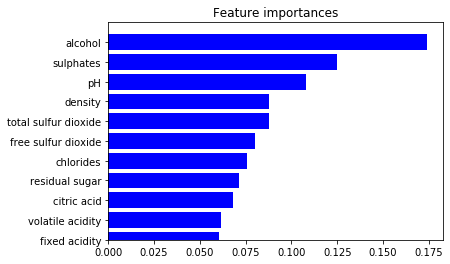

In [44]:
importance = rfc.feature_importances_

std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
             axis=0)
indices = np.argsort(importance)

# plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.barh(range(X.shape[1]), importance[indices],
       color="b",  align="center")

plt.yticks(range(X.shape[1]), column_names)
plt.ylim([0, X.shape[1]])
plt.show()

---
## White Wine

Let us now consider the white wine dataset.

In [4]:
# create a pandas dataframe
df_white = pd.read_csv('winequality-white.csv')
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
df_white.shape

(4898, 12)

There are 4,898 samples and 12 features, including our target feature - the wine quality.

In [6]:
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [7]:
df_white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [8]:
corr_matrix2 = df_white.corr()
corr_matrix2['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free sulfur dioxide     0.008158
citric acid            -0.009209
residual sugar         -0.097577
fixed acidity          -0.113663
total sulfur dioxide   -0.174737
volatile acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64

The features that have the biggest impact on wine quality are alcohol, pH, suplphates, chlorides, density, and volatile acidity.

---
### Data Visualization

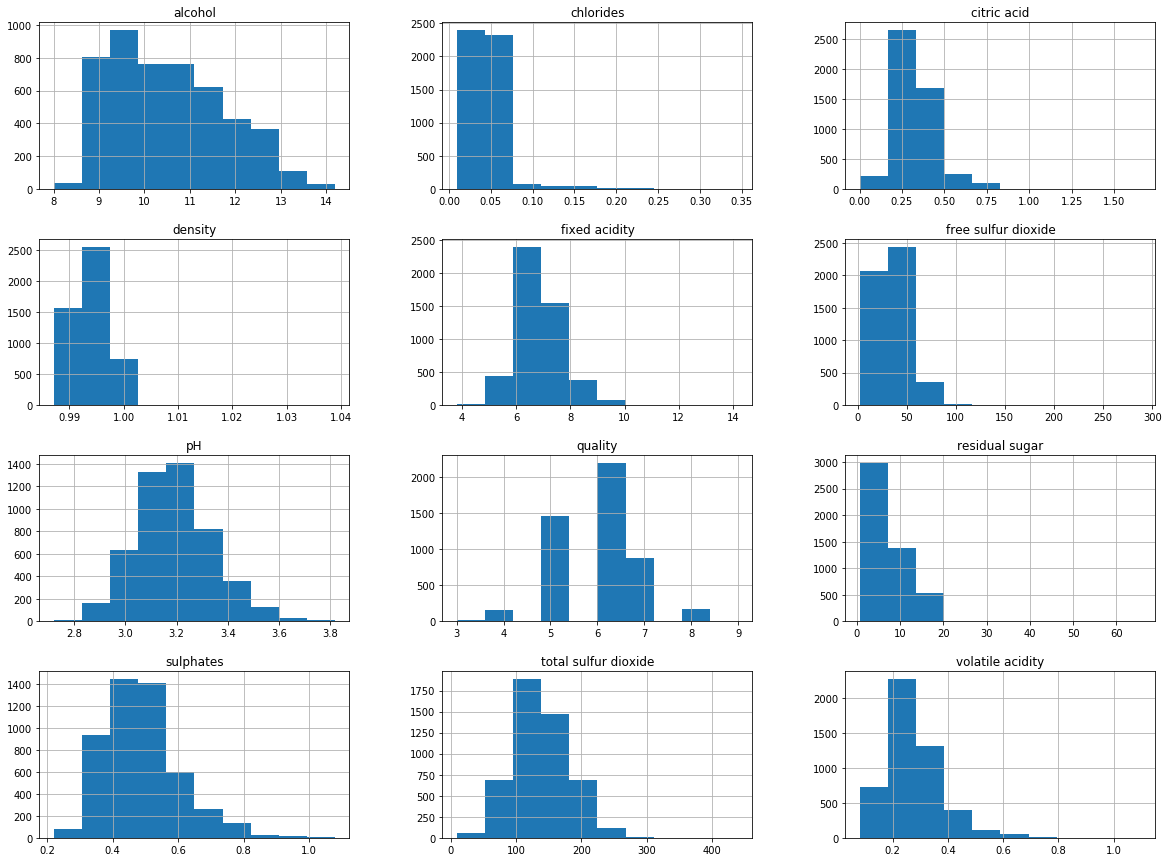

In [9]:
# histograms
df_white.hist(bins=10, figsize=(20, 15))
plt.show()

In [10]:
# pivot table
column_names = ['fixed acidity', 'volatile acidity', 'citric acid', 
                'residual sugar', 'chlorides', 'free sulfur dioxide', 
                'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

df_white_pivot_table = df_white.pivot_table(column_names, 
                                    ['quality'],
                                    aggfunc='median')

df_white_pivot_table

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,total sulfur dioxide,volatile acidity
quality,,,,,,,,,,,
3,10.45,0.041,0.345,0.994425,7.3,33.5,3.215,4.60,0.44,159.5,0.26
4,10.10,0.046,0.290,0.994100,6.9,18.0,3.160,2.50,0.47,117.0,0.32
5,9.50,0.047,0.320,0.995300,6.8,35.0,3.160,7.00,0.47,151.0,0.28
6,10.50,0.043,0.320,0.993660,6.8,34.0,3.180,5.30,0.48,132.0,0.25
7,11.40,0.037,0.310,0.991760,6.7,33.0,3.200,3.65,0.48,122.0,0.25
8,12.00,0.036,0.320,0.991640,6.8,35.0,3.230,4.30,0.46,122.0,0.26
9,12.50,0.031,0.360,0.990300,7.1,28.0,3.280,2.20,0.46,119.0,0.27


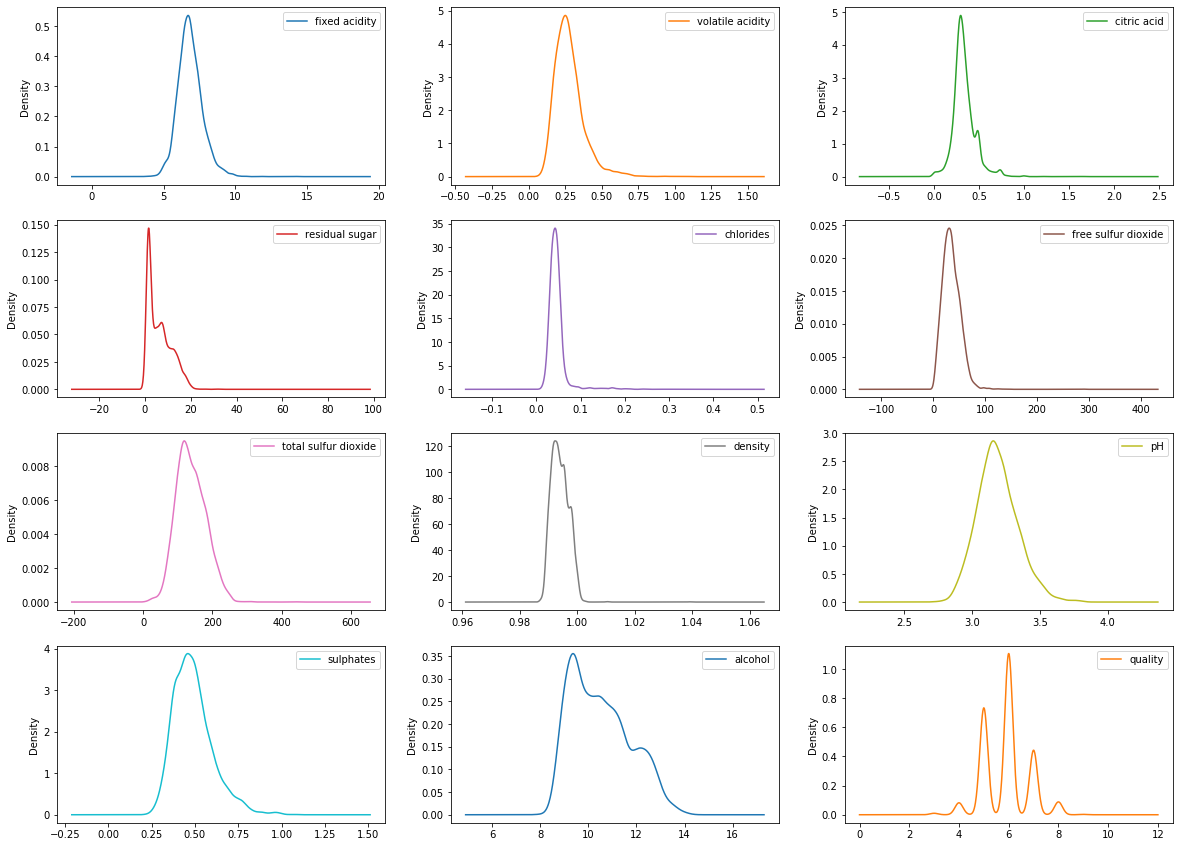

In [11]:
# density plots
df_white.plot(kind='density', subplots=True, figsize=(20,15),
           layout=(4,3), sharex=False)
plt.show()

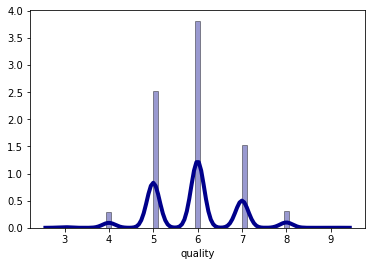

In [12]:
sns.distplot(df_white['quality'], hist=True, kde=True,
             bins='auto', color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.show()

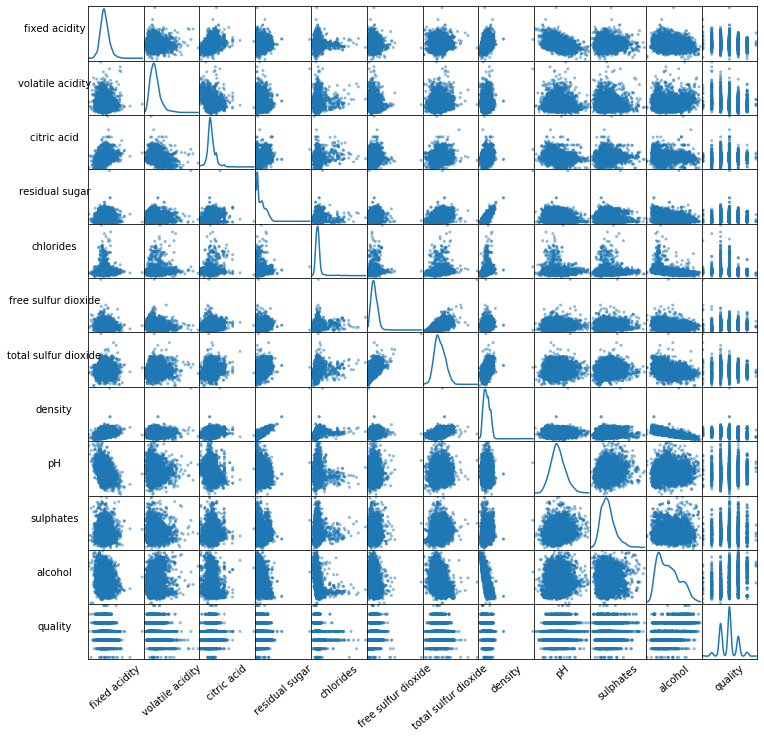

In [14]:
from pandas.plotting import scatter_matrix
sm = scatter_matrix(df_white, figsize=(12, 12), diagonal='kde')
#Change label rotation
[s.xaxis.label.set_rotation(40) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]
#May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-0.6,0.5) for s in sm.reshape(-1)]
#Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]
plt.show()

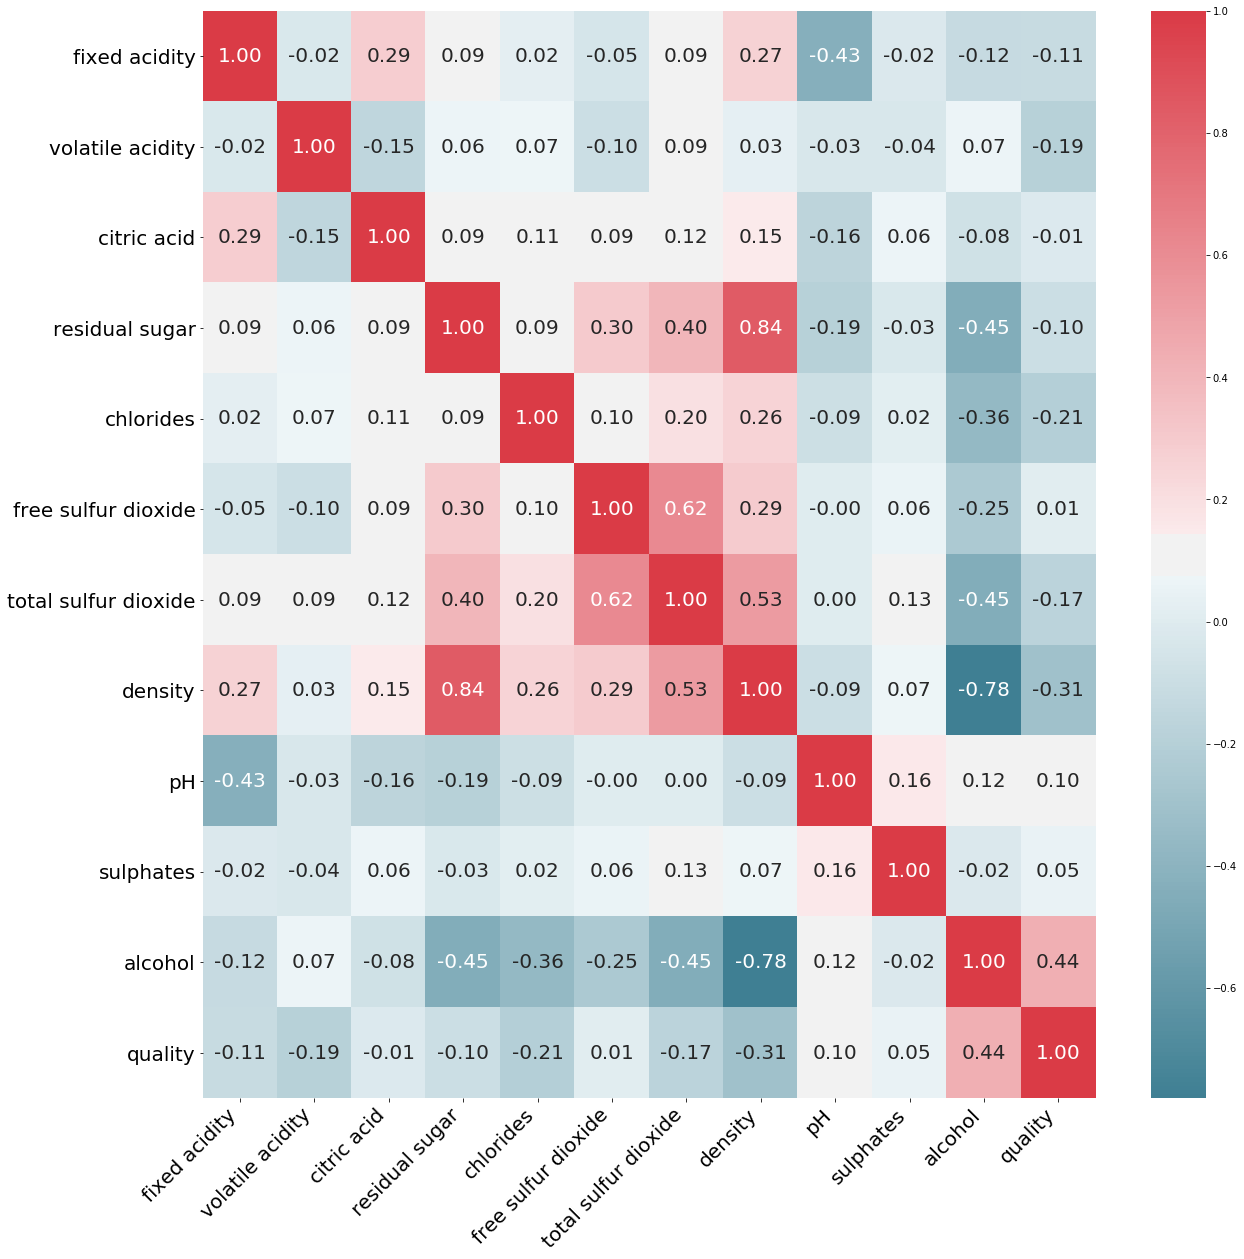

In [15]:
column_names = ['fixed acidity', 'volatile acidity', 'citric acid', 
                'residual sugar', 'chlorides', 'free sulfur dioxide', 
                'total sulfur dioxide', 'density', 'pH', 'sulphates', 
                'alcohol', 'quality']

# plot correlation matrix
fig, ax = plt.subplots(figsize=(20, 20))
colormap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr_matrix2, cmap=colormap, annot=True,
           fmt='.2f', annot_kws={'size': 20})
ax.set_xticklabels(column_names, 
                   rotation=45, 
                   horizontalalignment='right',
                   fontsize=20);
ax.set_yticklabels(column_names, fontsize=20);
plt.show()

In [ ]:
# Dividing wine as good and bad by giving a limit for the quality
bins = (2, 6, 9)
group_names = ['bad', 'good']
df_white['quality'] = pd.cut(df_white['quality'], bins = bins, labels = group_names)

0    3838
1    1060
Name: quality, dtype: int64


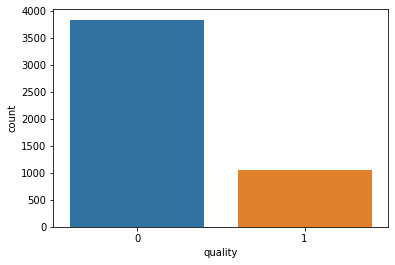

In [55]:
# let's assign labels to our quality variable
label_quality = LabelEncoder()
# Bad becomes 0 and good becomes 1
df_white['quality'] = label_quality.fit_transform(df_white['quality'])
print(df_white['quality'].value_counts())

sns.countplot(df_white['quality'])
plt.show()

There are 3,838 bad quality wines, and 1,060 good quality wines.

---
### Train/Test Split

In [56]:
# separate the dataset
X = df_white.drop('quality', axis=1)
y = df_white['quality']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

---
### Data Preprocessing

In [58]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

---
### Modeling

SupportVectorClassifier: 0.825930 (0.020147)
StochasticGradientDecentC: 0.789953 (0.023700)
RandomForestClassifier: 0.874421 (0.014710)
DecisionTreeClassifier: 0.818526 (0.019489)
GaussianNB: 0.729720 (0.029256)
KNeighborsClassifier: 0.830781 (0.018867)
AdaBoostClassifier: 0.818019 (0.017404)
LogisticRegression: 0.804491 (0.017744)


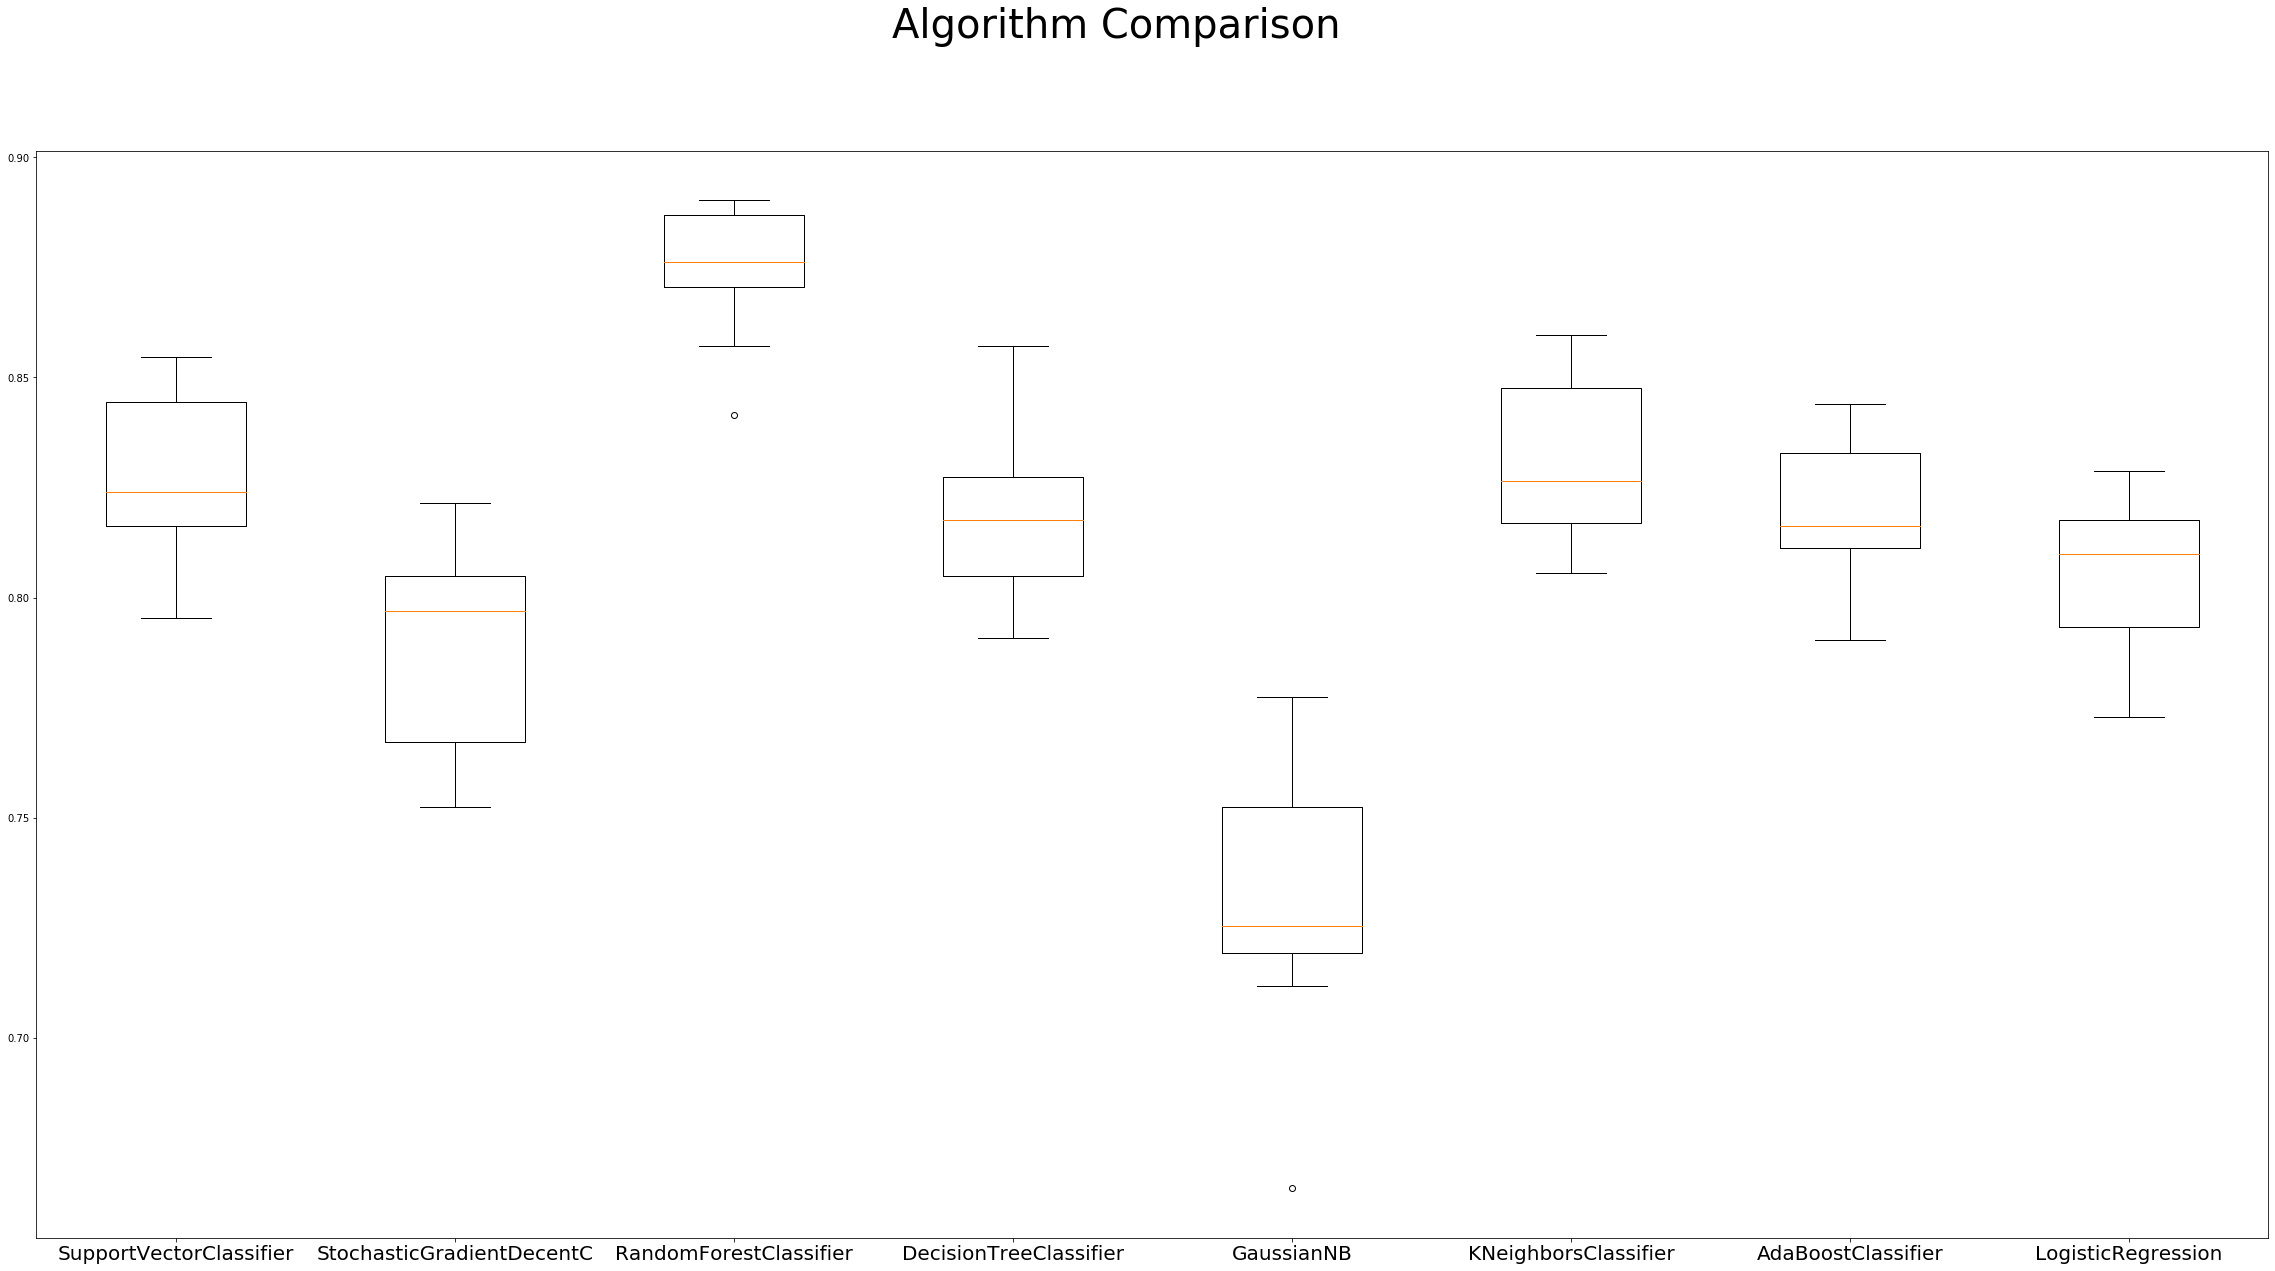

In [60]:
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('SupportVectorClassifier', SVC()))
models.append(('StochasticGradientDecentC', SGDClassifier()))
models.append(('RandomForestClassifier', RandomForestClassifier()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('GaussianNB', GaussianNB()))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('AdaBoostClassifier', AdaBoostClassifier()))
models.append(('LogisticRegression', LogisticRegression()))# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
   kfold = model_selection.KFold(n_splits=10, random_state=seed)
   cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
   results.append(cv_results)
   names.append(name)
   msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
   print(msg)
    
# boxplot algorithm comparison
fig = plt.figure(figsize=(40, 20))
fig.suptitle('Algorithm Comparison', fontsize=40)
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, fontdict={'fontsize': 20})
plt.show()

---
### Hyperparameter Tuning

#### SVC

In [61]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [62]:
def svc_param_selection(X, y, nfolds):
    param = {
        'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
        'kernel': ['linear', 'rbf'],
        'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4]
    }
    grid_search = GridSearchCV(svc, param_grid=param, 
                               scoring='accuracy', cv=nfolds)
    grid_search.fit(X, y)
    return grid_search.best_params_

svc_param_selection(X_train, y_train, 10)

{'C': 1.4, 'gamma': 1.1, 'kernel': 'rbf'}

In [74]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_absolute_error

svc2 = SVC(C= 1.4, gamma= 1.1, kernel= 'rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print('Confusion matrix')
print(confusion_matrix(y_test, pred_svc2))
print('Classification report')
print(classification_report(y_test, pred_svc2))
print('Accuracy score',accuracy_score(y_test, pred_svc2))

Confusion matrix
[[730  23]
 [103 124]]
Classification report
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       753
           1       0.84      0.55      0.66       227

    accuracy                           0.87       980
   macro avg       0.86      0.76      0.79       980
weighted avg       0.87      0.87      0.86       980

Accuracy score 0.8714285714285714


#### SGD Classifier

In [75]:
sgd = SGDClassifier(loss='hinge', penalty='l2', max_iter=60)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)

#### Random Forest Classifier

In [76]:
rfc = RandomForestClassifier(n_estimators=200, max_depth=20,
                             random_state=0)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

#### KNeighbors Classifier

In [77]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)

In [78]:
def knn_param_selection(X, y, nfolds):
    param = {
        'n_neighbors': [2, 3, 4, 5, 6],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'p': [1, 2]
    }
    grid_search = GridSearchCV(knn, param_grid=param, 
                               scoring='accuracy', cv=nfolds)
    grid_search.fit(X, y)
    return grid_search.best_params_

knn_param_selection(X_train, y_train, 10)

{'algorithm': 'auto', 'n_neighbors': 6, 'p': 1, 'weights': 'distance'}

In [79]:
knn2 = KNeighborsClassifier(algorithm= 'auto', 
                            n_neighbors= 5, p=2,
                           weights='distance')
knn2.fit(X_train, y_train)
pred_knn2 = knn2.predict(X_test)
print('Confusion matrix')
print(confusion_matrix(y_test, pred_knn2))
print('Classification report')
print(classification_report(y_test, pred_knn2))
print('Accuracy score',accuracy_score(y_test, pred_knn2))

Confusion matrix
[[708  45]
 [ 75 152]]
Classification report
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       753
           1       0.77      0.67      0.72       227

    accuracy                           0.88       980
   macro avg       0.84      0.80      0.82       980
weighted avg       0.87      0.88      0.87       980

Accuracy score 0.8775510204081632


#### AdaBoost Classifier

In [80]:
ada_classifier = AdaBoostClassifier(n_estimators=100)
ada_classifier.fit(X_train, y_train)
pred_ada = ada_classifier.predict(X_test)

In [81]:
# cross validation
scores = cross_val_score(ada_classifier,X_test,y_test, cv=5)
print('Accuracy score',scores.mean())

Accuracy score 0.7704081632653061


---
### Model Evaluation

In [82]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(
        mean_absolute_error(test_labels, predictions)))
    print('Accuracy = {:0.2f}%.'.format(accuracy_score(
        test_labels, predictions)*100))

In [83]:
evaluate(svc,X_test,y_test)
evaluate(svc2,X_test,y_test)
evaluate(sgd,X_test,y_test)
evaluate(rfc,X_test,y_test)
evaluate(knn2, X_test, y_test)
evaluate(ada_classifier,X_test,y_test)

Model Performance
Average Error: 0.1796 degrees.
Accuracy = 82.04%.
Model Performance
Average Error: 0.1286 degrees.
Accuracy = 87.14%.
Model Performance
Average Error: 0.2235 degrees.
Accuracy = 77.65%.
Model Performance
Average Error: 0.1276 degrees.
Accuracy = 87.24%.
Model Performance
Average Error: 0.1224 degrees.
Accuracy = 87.76%.
Model Performance
Average Error: 0.2071 degrees.
Accuracy = 79.29%.


---
### Feature Importance

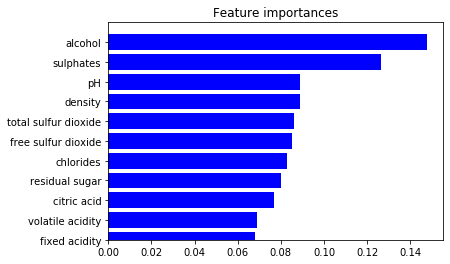

In [84]:
importance = rfc.feature_importances_

std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
             axis=0)
indices = np.argsort(importance)

# plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.barh(range(X.shape[1]), importance[indices],
       color="b",  align="center")

plt.yticks(range(X.shape[1]), column_names)
plt.ylim([0, X.shape[1]])
plt.show()

---